In [94]:
from surgeon_recording.reader import Reader
from glob import glob
from os.path import join
import os
import numpy as np
from scipy import stats
import plotly.express as px
import plotly.graph_objects as go
from copy import deepcopy
import pandas as pd
import csv
import matplotlib.pyplot as plt
import natsort
import matplotlib

In [95]:
reader = Reader()

In [64]:
# GOAL: first test data analsysis using the pilot data segmented in 2 tasks: cutting or suturing

data_folder = join('..', 'data','SEGMENTATION_suturing_cutting')
#subject_nb = ['12','15']
subject_nb = ['12', '14', '15', '20','22'] # 15 run 1 incomplete ? (5 cutting and 5 suturing)
blacklist = ['15']
print("WARNING: segmentation for 14,20 and 22 from already segmented parts = relative time does not always correspond to the initial file relative time")

experiment = 'chicken'

sensors_file = ['camera.csv', 'optitrack.csv','emg.csv','tps.csv']

sensors = ['camera', 'optitrack','emg','tps']

action = ['suturing', 'cutting']

tps_data_type = 'calibrated'

specialty_keys = ["neuro", "plastic"]
expertise_keys = ["novice", "expert"]

In [65]:
# declaration variable
run_dir = {}

segment_durations = {}
mean_time={}
std_time={}
sum_time={}
nb_event={}
tps_forces = {}
emg_data = {}
run_dir_segment = {}
average_emg={}
emg_data_all_segments= {}
channel_mean = {}
channel_std = {}
channel_max = {}
channel_min = {}
tps_forces_all_segments={}
average_tps={}
finger_mean_abs = {}
finger_mean = {}
finger_std = {}

for a in action:
    run_dir[a] = {}
    tps_forces[a] = {}
    emg_data[a] = {}
    run_dir_segment[a] = {}
    average_emg[a]={}
    segment_durations[a] = {}
    mean_time[a]={}
    std_time[a]={}
    sum_time[a]={}
    nb_event[a]={}
    emg_data_all_segments[a] = {}
    channel_mean[a] = {}
    channel_std[a] = {}
    tps_forces_all_segments[a] = {}
    average_tps[a]={}
    finger_mean_abs[a] = {}
    finger_mean[a] = {}
    channel_max[a] = {}
    channel_min[a] = {}
    finger_std[a] = {}
    
    for d in subject_nb:
        run_dir[a][d] = {}
        tps_forces[a][d] = {}
        emg_data[a][d] = {}
        run_dir_segment[a][d] = {}
        average_emg[a][d]={}
        segment_durations[a][d] = []
        mean_time[a][d]={}
        std_time[a][d]={}
        sum_time[a][d]={}
        nb_event[a][d]=[]
        emg_data_all_segments[a][d] = {}
        channel_mean[a][d] = {}
        channel_std[a][d] = {}
        tps_forces_all_segments[a][d] = {}
        average_tps[a][d]={}
        finger_mean_abs[a][d] = {}
        finger_mean[a][d] = {}
        channel_max[a][d] = {}
        channel_min[a][d] = {}
        finger_std[a][d] = {}
        
        for l in ['right', 'left']:
                for f in ['index', 'middle', 'thumb']:
                    key = l + '_' + f + '_' + tps_data_type
                    tps_forces[a][d][key] = []
                    tps_forces_all_segments[a][d][key] = []
                    average_tps[a][d][key] = {}
            
        for c in ['emg' + str(x) for x in range(8)]:
                emg_data[a][d][c] = []   
                average_emg[a][d][c] = {}      
                emg_data_all_segments[a][d][c] = []
       
 

In [ ]:
# directory of files
#ATTENTION: OK SI UN SEUL RUN DANS LE DOCUMENT SEGMENTATION POUR L'INSTANT

for a in action:
    for d in subject_nb:
        tmp = [x[0] for x in os.walk(join(data_folder, d, experiment,'segmentation',a))][2:]
        run_dir[a][d] = natsort.natsorted(tmp,reverse=False)


In [67]:
# data of different segments for one action and one subject put together
for a in action:
    for d in subject_nb:  
        for rd in run_dir[a][d]:
            #print(rd)              
            reader.play(rd) 
            time = reader.data['camera']['relative_time'].iloc[-1] - reader.data['camera']['relative_time'].iloc[0]       
            segment_durations[a][d].append(time) #add duration of each segment next to each other for one action and one subject
            #[duration segment1, duration segment2,...]
            
            for l in ['right', 'left']:
                for f in ['index', 'middle', 'thumb']:
                    key = l + '_' + f + '_' + tps_data_type
                    tps_forces[a][d][key].append(reader.data['tps'][key].to_numpy())  #add tps data for one action, one subject, one key in one structure
            
            for c in ['emg' + str(x) for x in range(8)]:
                emg_data[a][d][c].append(np.absolute(reader.data['emg'][c].to_numpy())) #add emg data for one action, one subject, one channel in several vectors (for each segment) next to each other
        
   

In [68]:
subject_data = pd.read_csv(join(data_folder,"subject_data.csv"))  

# TIME DATA 


In [69]:
# mean and std and total of the time on the 2 actions for each subject (given the different segments)
for act, value in segment_durations.items():
    for subject, values in value.items():
        mean_time[act][subject]=np.mean(values)   #valeur moyene sur les segments pour un sujet et une action
        std_time[act][subject]=np.std(values)
        sum_time[act][subject]=np.sum(values)
        print("action:", act, "    subject:", subject, "     mean time:", mean_time[act][subject], "     std time:", std_time[act][subject], "     sum:", sum_time[act][subject])
        print("----------------")
        
#duration of the runs (total, with the change of instruments....)
#total time not sinificant as sometimes time to put the sensors back on correctly
#should segment when they change instruments to compare this

action: suturing     subject: 12      mean time: 73.61266067292955      std time: 36.10759629507347      sum: 662.513946056366
----------------
action: suturing     subject: 14      mean time: 56.9252054063897      std time: 55.176643343033405      sum: 1081.5789027214043
----------------
action: suturing     subject: 15      mean time: 76.33140163421632      std time: 28.434620881866117      sum: 381.6570081710816
----------------
action: suturing     subject: 20      mean time: 46.17377092440924      std time: 18.383778494595433      sum: 554.0852510929109
----------------
action: suturing     subject: 22      mean time: 58.59828260209825      std time: 16.425318141359565      sum: 527.3845434188843
----------------
action: cutting     subject: 12      mean time: 9.004241764545426      std time: 5.007710673324429      sum: 72.03393411636341
----------------
action: cutting     subject: 14      mean time: 11.338099996248795      std time: 6.3555449556777335      sum: 68.02859997749277

In [71]:
#nb of actions (nb of segments for each action for each subject)

for a in action:
    for d in subject_nb:  
        nb_event[a][d]=len(run_dir[a][d])
        print("subject:", d, "    action:", a, "    nb of segments:", nb_event[a][d])
        print("----------------------")

subject: 12     action: suturing     nb of segments: 9
----------------------
subject: 14     action: suturing     nb of segments: 19
----------------------
subject: 15     action: suturing     nb of segments: 5
----------------------
subject: 20     action: suturing     nb of segments: 12
----------------------
subject: 22     action: suturing     nb of segments: 9
----------------------
subject: 12     action: cutting     nb of segments: 8
----------------------
subject: 14     action: cutting     nb of segments: 6
----------------------
subject: 15     action: cutting     nb of segments: 5
----------------------
subject: 20     action: cutting     nb of segments: 10
----------------------
subject: 22     action: cutting     nb of segments: 7
----------------------


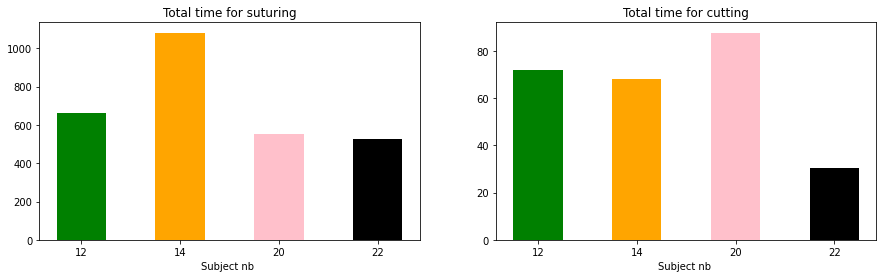

In [72]:
# colorbar plots of time statistics between the 2 actions

colors = {'12': 'green',
          '14': 'orange',
          '15': 'yellow',
          '20': 'pink',
          '22': 'black'}

#fig = go.Figure()
fig, axs = plt.subplots(1, 2, figsize=(15, 4))
a = action[0]
for i, a in enumerate(action):
    for d in subject_nb: 
        if not d in blacklist: 
            axs[i].bar(
            x=[d],
            height=[sum_time[a][d]],
            width=0.5,
            color=matplotlib.colors.to_rgba(colors[d]),
            #yerr=[std_time[a][d]]
        )
    
        axs[i].set_title("Total time for " + a)
        axs[i].set_xlabel("Subject nb ")

    
fig.savefig(join(os.getcwd(), "figures","data_manual_segmentation", "tot_time.png"))

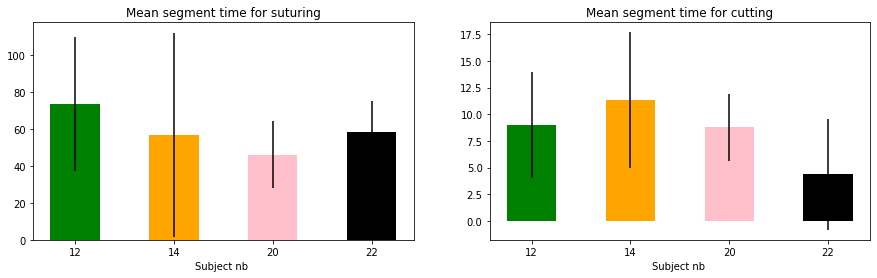

In [73]:
# colorbar plots of time statistics between the 2 actions, with std


fig, axs = plt.subplots(1, 2, figsize=(15, 4))
a = action[0]
for i, a in enumerate(action):
    for d in subject_nb: 
        if not d in blacklist: 
            axs[i].bar(
                x=[d],
                height=[mean_time[a][d]],
                width=0.5,
                color=matplotlib.colors.to_rgba(colors[d]),
                yerr=[std_time[a][d]]
            )
    
            axs[i].set_title("Mean segment time for " + a)
            axs[i].set_xlabel("Subject nb ")
fig.savefig(join(os.getcwd(), "figures","data_manual_segmentation", "mean_seg_time.png"))

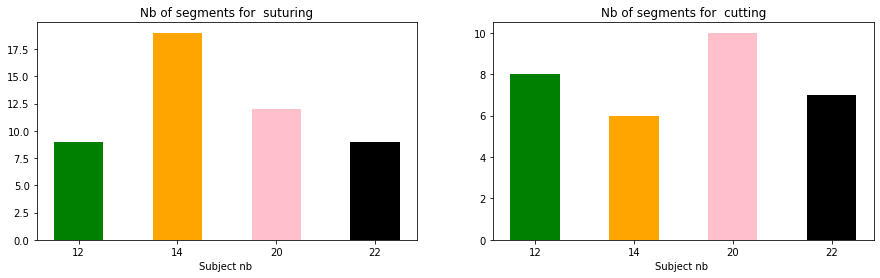

In [74]:
# plots number of actions (suturing/ cutting)

fig, axs = plt.subplots(1, 2, figsize=(15, 4))
a = action[0]
for i, a in enumerate(action):
    for d in subject_nb: 
        if not d in blacklist: 
            axs[i].bar(
            x=[d],
            height=[nb_event[a][d]],
            width=0.5,
            color=matplotlib.colors.to_rgba(colors[d]),
        )
    
        axs[i].set_title("Nb of segments for  " + a)
        axs[i].set_xlabel("Subject nb ")
fig.savefig(join(os.getcwd(), "figures","data_manual_segmentation", "nb_events.png"))

# EMG DATA

In [75]:
# EMG data: compare the subjects for same activity 

# take average values for emg signal (should compute the enveloppe first, see last analysis made for complete procedure)

for act, value1 in emg_data.items():
    for subject, value2 in value1.items():
        for ch, emg_vectors in value2.items():
            n = len(emg_vectors)                                   #nb of vectors for one subject and one action = nb of segments
            tmp = np.concatenate(emg_vectors[0:-1])
            emg_data_all_segments[act][subject][ch] = list(filter(lambda a: (a != 0), tmp))
            # take values over the data of all similar segments (cutting or suturing)
            average_emg[act][subject][ch]['mean'] = (np.mean(emg_data_all_segments[act][subject][ch]))            
            average_emg[act][subject][ch]['std'] = (np.std(emg_data_all_segments[act][subject][ch]))
            average_emg[act][subject][ch]['max'] = (np.max(emg_data_all_segments[act][subject][ch]))
            average_emg[act][subject][ch]['min'] = (np.min(emg_data_all_segments[act][subject][ch]))
            #print("subject:", subject, "    action:", act, "    emg channel:", ch, "    average emg:", average_emg[act][subject][ch],"    max:",average_emg[act][subject][ch]['max']  )
            #print("----------------------")

In [76]:
for act, value1 in average_emg.items():
    for subject, value2 in value1.items():
        tmp = []
        tmp2 = []
        tmp3 = []
        tmp4 = []
        for ch, value3 in value2.items():
            tmp.append(average_emg[act][subject][ch]['mean'])
            tmp2.append(average_emg[act][subject][ch]['std'])
            tmp3.append(average_emg[act][subject][ch]['max'])
            tmp4.append(average_emg[act][subject][ch]['min'])
            
        # put next to each other values for the channels (for plot)
        channel_mean[act][subject] = tmp                      
        channel_std[act][subject] = tmp2
        channel_max[act][subject] = tmp3
        channel_min[act][subject] = tmp4
   

### EMG plots

In [77]:

colors = {'12': 'green',
          '14': 'orange',
          '15': 'yellow',
          '20': 'pink',
          '22': 'black'}

fig = go.Figure()
a = action[0]
for d in subject_nb: 
    fig.add_trace(go.Bar(
        name=d,
        x=['emg' + str(x) for x in range(8)],
        y=channel_mean[a][d],
        width=0.15,
        marker={'color': colors[d]},
        #error_y=dict(type='data', array=channel_std[a][d])
    ))

fig.update_layout(barmode='group',
                  title=a,
                  legend_title="subject",
                  autosize=False,
                  width=1000,
                  height=500,
                 )
fig.write_image(join(os.getcwd(), "figures","data_manual_segmentation", "emg_per_subject_suturing.png"))

In [78]:

fig = go.Figure()
a = action[1]
for d in subject_nb: 
    fig.add_trace(go.Bar(
        name=d,
        x=['emg' + str(x) for x in range(8)],
        y=channel_mean[a][d],
        width=0.15,
        marker={'color': colors[d]},
        #error_y=dict(type='data', array=channel_std[a][d])
    ))
fig.update_layout(barmode='group',
                  title=a,
                  legend_title="subject",
                  autosize=False,
                  width=1000,
                  height=500,
                 )
fig.write_image(join(os.getcwd(), "figures","data_manual_segmentation", "emg_per_subject_cutting.png"))

In [80]:
# EMG data: compare for same subjects the 2 activities
colors2 = {'suturing': 'blue',
          'cutting': 'red'}

for d in subject_nb: 
    fig = go.Figure()
    for a in action:
        fig.add_trace(go.Bar(
        name=a,
        x=['emg' + str(x) for x in range(8)],
        y=channel_mean[a][d],
        width=0.3,
        marker={'color': colors2[a]},
        #error_y=dict(type='data', array=channel_std[a][d])
            
    ))

    fig.update_layout(barmode='group',
                  title="EMG, subject " + d,
                  legend_title="action",
                  autosize=False,
                  width=1000,
                  height=500,
                 )
    fig.write_image(join(os.getcwd(), "figures","data_manual_segmentation", "emg_per_activity_subject_" + d + ".png"))

# TPS DATA

## compare for same activity between subjects

In [81]:
# TPS data: compare for same activity the subjects

for act, value1 in tps_forces.items():
    #print(value1)
    for subject, value2 in value1.items():
        for key, tps_vectors in value2.items():
            n = len(tps_vectors)                                   #nb of vectors for one subject and one action = nb of sgments
            tps_forces_all_segments[act][subject][key] = np.concatenate(tps_vectors[0:-1])
            average_tps[act][subject][key]['mean'] = (np.mean(tps_forces_all_segments[act][subject][key]))          
            average_tps[act][subject][key]['std'] = (np.std(tps_forces_all_segments[act][subject][key]))
            #print("subject:", subject, "    action:", act, "    key:", key, "    average tps:", average_tps[act][subject][key])
            #print("----------------------")

In [83]:
finger_names = []
for act, value1 in average_tps.items():
    for subject, value2 in value1.items():
        tmp = []
        tmp2 = []
        tmp3 = []
        for finger, value3 in value2.items():
            finger_names.append(finger)
            #print(average_tps[act][subject][finger])
            tmp.append(abs(average_tps[act][subject][finger]['mean']))
            tmp2.append(average_tps[act][subject][finger]['mean'])
            tmp3.append(average_tps[act][subject][finger]['std'])
        finger_mean_abs[act][subject] = tmp                      #valeurs moyennes pour chaque doigt a la suite pour une personne et une action
        finger_mean[act][subject] = tmp2
        finger_std[act][subject] = tmp3
    #print(channel_mean)
   

### TPS plots

In [91]:
#colors = {'12': 'green',
#          '15': 'yellow'}
fig = go.Figure()
a = action[0]
for d in subject_nb: 
    fig.add_trace(go.Bar(
        name=d,
        x=finger_names,
        #y=finger_mean_abs[a][d],
        y=finger_mean[a][d],
        width=0.15,
        marker={'color': colors[d]},
        #error_y=dict(type='data', array=finger_std[a][d])
    ))

fig.update_layout(barmode='group',
                  #title="TPS, " +a+ ", absolute value",
                  title="TPS, " +a,
                  legend_title="subject",
                  autosize=False,
                  width=1000,
                  height=500,
                 )
fig.write_image(join(os.getcwd(), "figures","data_manual_segmentation", "tps_per_subject_suturing.png"))

In [92]:

fig = go.Figure()
a = action[1]
for d in subject_nb: 
    fig.add_trace(go.Bar(
        name=d,
        x=finger_names,
        #y=finger_mean_abs[a][d],
        y=finger_mean[a][d],
        width=0.15,
        marker={'color': colors[d]},
        #error_y=dict(type='data', array=finger_std[a][d])
    ))
fig.update_layout(barmode='group',
                  #title="TPS, " +a+ ", absolute value",
                  title="TPS, " +a,
                  legend_title="subject",
                  autosize=False,
                  width=1000,
                  height=500,
                 )
fig.write_image(join(os.getcwd(), "figures","data_manual_segmentation", "tps_per_subject_cutting.png"))

## compare for same subject between activities

In [93]:
# tps data: compare for same subjects the 2 activities


for d in subject_nb: 
    fig = go.Figure()
    for a in action:
        fig.add_trace(go.Bar(
        name=a,
        x=finger_names,
        #y=finger_mean_abs[a][d],
        y=finger_mean[a][d],
        width=0.15,
        marker={'color': colors2[a]},
        
        #error_y=dict(type='data', array=finger_std[a][d])
    ))

    fig.update_layout(barmode='group',
                  #title="TPS, absolute values, subject " + d,
                  title="TPS, subject " + d,
                  legend_title="action",
                  autosize=False,
                  width=1000,
                  height=500,
                 )
    fig.write_image(join(os.getcwd(), "figures","data_manual_segmentation", "tps_per_activity_subject_" + d + ".png"))